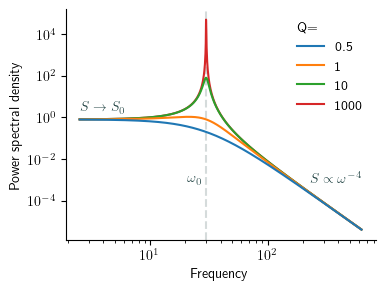

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)

def sho_psd(omega, S0, w0, Q):
    """
    Stochastically driven, dampled harmonic oscillator.
    """
    # What follows is the usual celerite2 SHO PSD:
    return np.sqrt(2/np.pi) * S0 * w0**4 / ((omega**2 - w0**2)**2 + (omega**2 * w0**2 / Q**2))

freq = np.logspace(0.4, 2.8, 1000)

Qs = [0.5, 1, 10, 1000]
S0 = 1
w0 = 2*np.pi*30
fig, ax = plt.subplots(figsize=(4, 3))
for i, Q in enumerate(Qs):
    psd = sho_psd(2*np.pi*freq, S0=S0, w0=w0, Q=Q)

    ax.loglog(freq, psd, label=Q, zorder=-i)

# Gamma = w0/Qs[-1]
# ax.loglog(freq, 1 / (1 + 4 * (freq - w0/(2*np.pi))**2/Gamma**2))

ax.set(
    xlabel='Frequency',
    ylabel='Power spectral density'
)
ax.legend(loc='upper right', title='Q=', frameon=False, alignment='left', fontsize=10)
ax.annotate(
    r"$S \propto \omega^{-4}$", 
    (freq.max(), np.exp(np.log(psd).min() + 5)), 
    ha='right', va='bottom', color='darkslategray'
)
ax.annotate(
    r"$S \rightarrow S_0$", 
    (freq.min(), 1.5 * S0), 
    ha='left', va='bottom', color='darkslategray'
)
ax.axvline(
    w0 / (2*np.pi), ls='--', alpha=0.2, 
    color='darkslategray', zorder=-10
)
ax.annotate(
    r"$\omega_0$", 
    (w0 / (2*np.pi) / 1.1, np.exp(np.log(psd).min() + 5)), 
    ha='right', va='bottom', color='darkslategray'
)
for sp in ['right', 'top']:
    ax.spines[sp].set_visible(False)
fig.savefig('plots/sho_kernel.pdf', bbox_inches='tight')